In [184]:
import pandas as pd
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from IPython.display import Image
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
from datetime import date
import math
import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

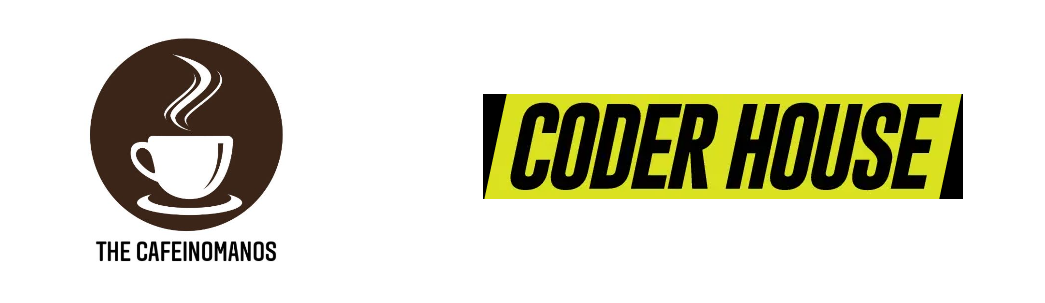

In [2]:
Image(filename='C:/Cafeinomanos/Cafeinomanos.png')

# PRIMER ENTREGA (01/02/2022)

## 1- Presentación de la empresa

### Acerca de nosotros: somos una organización ad honorem, creada por 4 integrantes fanatizados y motivados por el café. El nombre de la misma es 'Cafeinomanos' y nos dedicamos a brindarles soluciones en cuanto a lo que la ciencia de datos abarque y esté al alcance, a distintas empresas, sobre todo aquellas relacionadas con el ambiente y mundo del café, con el fin de resolver ciertas necesidades haciendo nada más y nada menos que hablar a los datos.

## 2- Preguntas y objetivo de la investigación

### El objetivo de la corriente investigación tiene como objetivo analizar, a través de distintos datasets de una cadena de café, sus ventas correspondientes a el período de abril 2019 según distintos factores. El hito principal y motivación por parte del cliente es la búsqueda de una acertada campaña de marketing orientando la misma a aquellos nichos y segmentos de clientes aún sin explotar y así atraer a los mismos hacia la empresa. Logrando como resultando un incremento en la totalidad de sus clientes. A partir de las ventas brindadas por parte del cliente sobre abril 2019 ¿A qué nichos y perfiles de clientes necesitarían orientar sus próximas campañas publicitarias de manera que los resultados se vean reflejados en un incremento en ventas?

## 3- Confirmación del equipo de trabajo

#### El equipo de trabajo se conforma de: María Victoria Yaconisi (1.1), Nicolás Lopez (1.2), Mateo Aguiar (1.3) y Mauro Rodriguez Vidal (1.4)

## 4- Análisis de componentes principales

### Como mencionamos anteriormente, contamos con un conjunto de distintos datasets orientados al café y a lo que su negocio respecta. Los mismos son: Staff, Customers, Generations, Product, Sales Target, Sales Outlet, Pastry Inventory, Sales Recieps (201904) y Dates.

#### a. Customers ☞ Este csv contiene información referida en cuanto a los clientes con sus datos principales

#### b. Generations ☞ Este csv contiene información referida en cuanto a los nombres de generaciones a partir de sus años de nacimiento

#### c. Product ☞  Este csv contiene información referida en cuanto a los productos con sus características principales

#### d. Sales Target ☞ Este csv contiene información referida en cuanto a los targets establecidos

#### e. Sales Outlet ☞ Este csv contiene información referida a los sales outlet y algunas características

#### f. Pastry Inventory ☞ Este csv contiene información referida a los manejos de stock de algunos productos de manera diaria

#### g. Sales Recieps (201904) ☞  Este csv contiene información referida en cuanto a las ventas ocurridas en el período de abril 2019

#### h. Dates ☞ Este csv contiene información referida a fechas, intentando ampliar la información a partir de una fecha determinada

#### i. Staff ☞ Este csv contiene información referida a los empleados de la cadena y a sus principales datos

## 5- Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)

#### El dataset utilizado para la realización de los distintos análisis fue proporcionado por los socios gerentes de la S.R.L. con el objetivo de encontrar los distintos desaciertos, si es que hubiesen, dentro de la campaña de ventas, para así, poder tener un mejor panorama de aquellos verdaderos clientes y de aquellos potenciales.

#### El mismo se compone de 9 archivos csv (listados previamente) que se encuentran descargados localmente y accedidos mediante la librería de pandas con la función pandas.read_csv para luego ser trabajados uno por uno como distintos dataframes que sus nombres coinciden con el nombre del csv. Consideramos que todos los dataset serán utilizados para así brindar una mejor solución para la investigación

## 6- Generación del primer Data Wrangling y EDA, apuntando a sus datos (insights) univariado, bivariado y multivariado

## 1. Customers

In [3]:
customer = pd.read_csv('C:/Cafeinomanos/customer.csv')

### 1.1. Data Wrangling

In [4]:
#Visualicemos el df
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [5]:
#Seteamos el indice
customer.set_index('customer_id')

,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
customer_id,,,,,,,,
1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...
8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996


In [6]:
#Empecemos viendo la forma de nuestro df
customer.shape

(2246, 9)

In [7]:
#Tipos de datos
customer.dtypes

customer_id             int64
home_store              int64
customer_first-name    object
customer_email         object
customer_since         object
loyalty_card_number    object
birthdate              object
gender                 object
birth_year              int64
dtype: object

In [8]:
#Totalidad de registros por columnas
customer.count()

customer_id            2246
home_store             2246
customer_first-name    2246
customer_email         2246
customer_since         2246
loyalty_card_number    2246
birthdate              2246
gender                 2246
birth_year             2246
dtype: int64

In [9]:
#Podriamos usar pivot para verlos mejor
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,2246.0,4285.902048,3088.088265,1.0,562.25,5323.5,5884.75,8501.0
home_store,2246.0,4.956812,1.852562,3.0,3.00,5.0,5.00,8.0
birth_year,2246.0,1978.385574,14.925503,1950.0,1965.00,1981.0,1991.00,2001.0


In [10]:
#Veamos un poco mas de informacion
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


In [11]:
#Valores unicos que tiene cada columna
customer["home_store"].value_counts()

5    945
3    800
8    501
Name: home_store, dtype: int64

In [12]:
#Valores unicos que tiene cada columna
customer["customer_first-name"].value_counts()

Marny                6
Willow               6
Summer               5
Hall                 5
Hashim               5
                    ..
Larissa Hansen       1
Linda Barlow         1
Alfreda Whitfield    1
Latifah Becker       1
Linda                1
Name: customer_first-name, Length: 1640, dtype: int64

In [13]:
#Valores unicos que tiene cada columna
customer["customer_email"].value_counts()

Venus@adipiscing.edu        1
Shaeleigh@nonummy.edu       1
Gannon@dictum.net           1
Rae@eget.net                1
Ezekiel@sollicitudin.edu    1
                           ..
Mary@non.gov                1
Kyra@sapien.net             1
Levi@et.org                 1
Justine@fermentum.com       1
Herrod@ultrices.gov         1
Name: customer_email, Length: 2246, dtype: int64

In [14]:
#Valores unicos que tiene cada columna
customer["customer_since"].value_counts()

2017-05-08    8
2017-11-03    8
2017-09-23    7
2017-08-21    7
2018-05-13    7
             ..
2019-01-11    1
2019-01-21    1
2017-12-22    1
2017-07-01    1
2017-02-27    1
Name: customer_since, Length: 794, dtype: int64

In [15]:
#Valores unicos que tiene cada columna
customer["loyalty_card_number"].value_counts()

908-424-2890    1
310-797-8728    1
228-516-4628    1
552-336-1347    1
019-883-3253    1
               ..
943-483-7773    1
006-338-9858    1
995-486-9864    1
409-522-9660    1
241-906-4009    1
Name: loyalty_card_number, Length: 2246, dtype: int64

In [16]:
#Valores unicos que tiene cada columna
customer["birthdate"].value_counts()

2001-04-09    6
1975-10-03    5
1988-07-06    4
1973-03-15    4
1991-01-24    4
             ..
1985-10-26    1
1994-11-05    1
1986-01-21    1
1989-01-17    1
1966-08-27    1
Name: birthdate, Length: 1883, dtype: int64

In [17]:
#Valores unicos que tiene cada columna
customer["gender"].value_counts()

F    977
M    726
N    543
Name: gender, dtype: int64

In [18]:
#Valores unicos que tiene cada columna
customer["birth_year"].value_counts()

1995    65
1992    63
1998    62
1991    62
1996    61
1993    60
2000    60
1997    59
1999    58
1990    58
1989    56
1981    56
1994    55
1988    54
1984    52
1987    52
1985    51
1983    50
1986    50
1980    49
1982    45
1957    42
1974    40
1960    40
1967    40
1953    39
1973    38
1959    38
1962    37
1968    36
1952    36
1963    36
1972    35
1964    35
1977    35
1951    35
1970    35
1966    35
1978    34
1961    34
1956    34
1955    34
1954    34
1965    34
1958    34
1976    33
1969    33
1971    32
1979    31
1975    31
1950    21
2001    17
Name: birth_year, dtype: int64

### 1.2. EDA

#### En base al análisis realizado anteriormente, decidimos realizar algunos cambios:

#### Primero, convertimos las fechas en formato DateTime (Manteniendo las columnas originales para ser utilizadas luego)

In [19]:
customer["customer_since_DT"] = pd.to_datetime(customer["customer_since"])
customer["birthdate_DT"] = pd.to_datetime(customer["birthdate"])
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,customer_since_DT,birthdate_DT
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,2017-01-04,1950-05-29
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,2017-01-07,1950-07-30
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,2017-01-10,1950-09-30
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,2017-01-13,1950-12-01
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,2017-01-15,1951-02-01


#### Luego calculamos la edad de cada cliente en base a la fecha de nacimiento.

In [20]:
from datetime import date

customer['age'] = (int(date.today().strftime("%Y")) - customer['birth_year'].astype(int))



#### Luego, reemplazamos los valores de la columna Genero para que sea más legible en los gráficos

In [21]:
#Renombro los valores para que sean más legibles en el gráfico
customer['gender'] = customer.gender.str.replace('F','Female')
customer['gender'] = customer.gender.str.replace('M','Male')
customer['gender'] = customer.gender.str.replace('N','Unknown')


#Genero un Count por valor para tener una idea de la información del DataSet.
customer['gender'].value_counts()

Female     977
Male       726
Unknown    543
Name: gender, dtype: int64

#### Y por último revisamos que no exista ningún valor Nan que pueda dificiltar análisis futuro

In [22]:
#Chequeamos si hay aún valones NaN
check_for_nan = customer.isnull().values.any()
check_for_nan

False

### 1.3. Diccionario de datos

## 2. Generations

In [23]:
generations = pd.read_csv('C:/Cafeinomanos/generations.csv')

### 2.1. Data Wrangling

In [24]:
#Visualicemos el df
generations.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [25]:
#Seteamos el indice
generations.set_index('birth_year')

,generation
birth_year,
1946,Baby Boomers
1947,Baby Boomers
1948,Baby Boomers
1949,Baby Boomers
1950,Baby Boomers
...,...
2011,Gen Z
2012,Gen Z
2013,Gen Z


In [26]:
#Empecemos viendo la forma de nuestro df
generations.shape

(70, 2)

In [27]:
#Tipos de datos
generations.dtypes

birth_year     int64
generation    object
dtype: object

In [28]:
#Totalidad de registros por columnas
generations.count()

birth_year    70
generation    70
dtype: int64

In [29]:
#Podriamos usar pivot para verlos mejor
generations.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,70.0,1980.5,20.351085,1946.0,1963.25,1980.5,1997.75,2015.0


In [30]:
#Veamos un poco mas de informacion
generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [31]:
#Valores unicos que tiene cada columna
generations["generation"].value_counts()

Gen Z                  21
Baby Boomers           19
Gen X                  15
Older Millennials      10
Younger Millennials     5
Name: generation, dtype: int64

### 2.2. EDA

In [32]:
#Chequeamos si hay valones NaN
check_for_nan = generations.isnull().values.any()
check_for_nan

False

#### A partir del Data Wranling podemos ver que no existen valores nulos. Aclarado esto y viendo que no hay hallazgos relevantes por editar, tampoco existen valores atípicos que sean necesarios modificar.

### 2.3. Diccionario de datos

## 3. Customer

In [33]:
product = pd.read_csv('C:/Cafeinomanos/product.csv')

### 3.1. Data Wrangling

---
Visualizamos el DataFrame:

In [34]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


---
Vemos la forma:

In [35]:
product.shape

(88, 12)

---
Observamos de qué tipo son los datos:

In [36]:
product.dtypes

product_id                   int64
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price        object
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object

---
Totalidad de registros por columnas

In [37]:
product.count()

product_id                 88
product_group              88
product_category           88
product_type               88
product                    88
product_description        88
unit_of_measure            88
current_wholesale_price    88
current_retail_price       88
tax_exempt_yn              88
promo_yn                   88
new_product_yn             88
dtype: int64

---
Hacemos una mirada general del dataset (con pivot para apreciarlo mejor)

In [38]:
product.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,88.0,44.534091,25.605293,1.00,22.75,44.500,66.25,89.0
current_wholesale_price,88.0,3.888409,5.649682,0.04,0.63,1.195,5.36,36.0


cabe destacar que faltan muchas columnas (filas luego de pivot) porque son "object"

---
Y por último, buscamos más información general de la tabla

In [39]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


Observamos que no hay ningún valor NaN

### 3.2. EDA

Ahora procederemos a eliminar las columnas que no aportan información relevante al análisis.


In [40]:
customerV2 = product.drop(['product_description','tax_exempt_yn','new_product_yn','promo_yn'], axis=1)
customerV2.dropna()

,product_id,product_group,product_category,product_type,product,unit_of_measure,current_wholesale_price,current_retail_price
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,12 oz,14.40,$18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,12 oz,14.40,$18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,1 lb,11.80,$14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,1 lb,16.36,$20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,1 lb,12.00,$15.00
...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,pump,0.04,$0.80
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,6 oz,1.20,$6.00
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1.5 oz,0.60,$3.00
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,16 oz,0.42,$2.10


### 3.3. Diccionario de datos

## 4. Sales Target

In [41]:
sales_target = pd.read_csv('C:/Cafeinomanos/sales targets.csv')

### 4.1. Data Wrangling

In [42]:
#Visualicemos el df
sales_target.head()

,sales_outlet_id,year_month,beans_goal,beverage_goal,food_goal,merchandise _goal,total_goal
0,3,Apr-19,720,13500,3420,360,18000
1,4,Apr-19,720,13500,3420,360,18000
2,5,Apr-19,1000,18750,4750,500,25000
3,6,Apr-19,720,13500,3420,360,18000
4,7,Apr-19,720,13500,3420,360,18000


In [43]:
#Seteamos el indice
sales_target.set_index('sales_outlet_id')

,year_month,beans_goal,beverage_goal,food_goal,merchandise _goal,total_goal
sales_outlet_id,,,,,,
3,Apr-19,720,13500,3420,360,18000
4,Apr-19,720,13500,3420,360,18000
5,Apr-19,1000,18750,4750,500,25000
6,Apr-19,720,13500,3420,360,18000
7,Apr-19,720,13500,3420,360,18000
8,Apr-19,900,16875,4275,450,22500
9,Apr-19,720,13500,3420,360,18000
10,Apr-19,720,13500,3420,360,18000


In [44]:
#Empecemos viendo la forma de nuestro df
sales_target.shape

(8, 7)

In [45]:
#Tipos de datos
sales_target.dtypes

sales_outlet_id       int64
year_month           object
beans_goal            int64
beverage_goal         int64
food_goal             int64
merchandise _goal     int64
total_goal            int64
dtype: object

In [46]:
#Totalidad de registros por columnas
sales_target.count()

sales_outlet_id      8
year_month           8
beans_goal           8
beverage_goal        8
food_goal            8
merchandise _goal    8
total_goal           8
dtype: int64

In [47]:
#Podriamos usar pivot para verlos mejor
sales_target.describe().T

,count,mean,std,min,25%,50%,75%,max
sales_outlet_id,8.0,6.500,2.449490,3.0,4.75,6.5,8.25,10.0
beans_goal,8.0,777.500,109.772492,720.0,720.00,720.0,765.00,1000.0
beverage_goal,8.0,14578.125,2058.234225,13500.0,13500.00,13500.0,14343.75,18750.0
food_goal,8.0,3693.125,521.419337,3420.0,3420.00,3420.0,3633.75,4750.0
merchandise _goal,8.0,388.750,54.886246,360.0,360.00,360.0,382.50,500.0
total_goal,8.0,19437.500,2744.312300,18000.0,18000.00,18000.0,19125.00,25000.0


In [48]:
#Veamos un poco mas de informacion
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales_outlet_id    8 non-null      int64 
 1   year_month         8 non-null      object
 2   beans_goal         8 non-null      int64 
 3   beverage_goal      8 non-null      int64 
 4   food_goal          8 non-null      int64 
 5   merchandise _goal  8 non-null      int64 
 6   total_goal         8 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 576.0+ bytes


In [49]:
#Valores unicos que tiene cada columna
sales_target["year_month"].value_counts()

Apr-19    8
Name: year_month, dtype: int64

### 4.2. EDA

In [50]:
#Chequeamos si hay valones NaN
check_for_nan = sales_target.isnull().values.any()
check_for_nan

False

#### A partir del Data Wranling podemos ver que en el registro está en falta el sales_outlet_id = 2. Puede que no haya habido registros para el mes de abril para ese ID y que no sea una falta y/o pérdida de datos. No hay valores nulos en el dataframe. Aclarado esto y viendo que no son hallazgos relevantes por editar, no existen valores atípicos que sean necesarios modificar.

### 4.3. Diccionario de datos

## 5. Sales Outlet

In [51]:
sales_outlet = pd.read_csv('C:/Cafeinomanos/sales_outlet.csv')

### 5.1. Data Wrangling

In [52]:
#Visualicemos el df
sales_outlet.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [53]:
#Seteamos el indice
sales_outlet.set_index('sales_outlet_id')

,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
sales_outlet_id,,,,,,,,,,,
2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [54]:
#Empecemos viendo la forma de nuestro df
sales_outlet.shape

(9, 12)

In [55]:
#Tipos de datos
sales_outlet.dtypes

sales_outlet_id           int64
sales_outlet_type        object
store_square_feet         int64
store_address            object
store_city               object
store_state_province     object
store_telephone          object
store_postal_code         int64
store_longitude         float64
store_latitude          float64
manager                 float64
Neighorhood              object
dtype: object

In [56]:
#Podriamos usar pivot para verlos mejor
sales_outlet.describe().T

,count,mean,std,min,25%,50%,75%,max
sales_outlet_id,9.0,6.000000,2.738613,2.000000,4.000000,6.000000,8.000000,10.000000
store_square_feet,9.0,1544.444444,743.490267,900.000000,1200.000000,1300.000000,1600.000000,3400.000000
store_postal_code,9.0,10427.111111,623.535974,10002.000000,10011.000000,10021.000000,11106.000000,11432.000000
store_longitude,9.0,-73.962171,0.067975,-74.010130,-74.000502,-73.990338,-73.960000,-73.795168
store_latitude,9.0,40.731136,0.030933,40.677645,40.713290,40.734367,40.761196,40.770000
manager,8.0,23.500000,12.247449,6.000000,14.750000,23.500000,32.250000,41.000000


In [57]:
#Veamos un poco mas de informacion
sales_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sales_outlet_id       9 non-null      int64  
 1   sales_outlet_type     9 non-null      object 
 2   store_square_feet     9 non-null      int64  
 3   store_address         9 non-null      object 
 4   store_city            9 non-null      object 
 5   store_state_province  9 non-null      object 
 6   store_telephone       9 non-null      object 
 7   store_postal_code     9 non-null      int64  
 8   store_longitude       9 non-null      float64
 9   store_latitude        9 non-null      float64
 10  manager               8 non-null      float64
 11  Neighorhood           9 non-null      object 
dtypes: float64(3), int64(3), object(6)
memory usage: 992.0+ bytes


In [58]:
#Valores unicos que tiene cada columna
sales_outlet["sales_outlet_type"].value_counts()

retail       8
warehouse    1
Name: sales_outlet_type, dtype: int64

In [59]:
#Valores unicos que tiene cada columna
sales_outlet["store_city"].value_counts()

New York            6
Jamaica             1
Long Island City    1
Brooklyn            1
Name: store_city, dtype: int64

In [60]:
#Valores unicos que tiene cada columna
sales_outlet["store_state_province"].value_counts()

NY    9
Name: store_state_province, dtype: int64

In [61]:
#Valores unicos que tiene cada columna
sales_outlet["manager"].value_counts()

6.0     1
11.0    1
16.0    1
21.0    1
26.0    1
31.0    1
36.0    1
41.0    1
Name: manager, dtype: int64

In [62]:
#Valores unicos que tiene cada columna
sales_outlet["Neighorhood"].value_counts()

Jamaica              1
Astoria              1
Gowanus              1
Lower Manhattan      1
Lower East Side      1
Upper East Side      1
Hell's Kitchen       1
Chelsea              1
Greenwich Village    1
Name: Neighorhood, dtype: int64

In [63]:
#Valores unicos que tiene cada columna
sales_outlet["store_postal_code"].value_counts()

11432    1
11106    1
11215    1
10007    1
10002    1
10021    1
10036    1
10011    1
10014    1
Name: store_postal_code, dtype: int64

In [64]:
#Valores unicos que tiene cada columna
sales_outlet["store_telephone"].value_counts()

972-871-0402    1
777-718-3190    1
619-347-5193    1
343-212-5151    1
613-555-4989    1
287-817-2330    1
652-212-7020    1
242-212-0080    1
674-646-6434    1
Name: store_telephone, dtype: int64

In [65]:
#Valores unicos que tiene cada columna
sales_outlet["sales_outlet_id"].value_counts()

2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: sales_outlet_id, dtype: int64

### 5.2. EDA

In [66]:
#Chequeamos si hay valones NaN
check_for_nan = sales_outlet.isnull().values.any()
check_for_nan

True

In [67]:
check_for_nan = sales_outlet['manager'].isnull().values.any()
check_for_nan

True

#### A partir del Data Wranling podemos ver que la columna de manager contiene un dato NaN. Específicamente el sales_outlet_id = 2. También, a descatacar que no existe ningún sales_outlet_id = 1. Aclarado esto y viendo que no son hallazgos relevantes por editar, no existen valores atípicos que sean necesarios modificar.

### 5.3. Diccionario de datos

## 6. Pastry Inventory

In [68]:
pastry_inventory = pd.read_csv('C:/Cafeinomanos/pastry inventory.csv')

### 6.1. Data Wrangling

In [69]:
#Visualicemos el df
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [70]:
#Seteamos el indice
pastry_inventory.set_index('sales_outlet_id')

,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
sales_outlet_id,,,,,,
3,4/1/2019,69,18,8,10,56%
3,4/1/2019,70,18,12,6,33%
3,4/1/2019,71,18,8,10,56%
3,4/1/2019,72,48,9,39,81%
3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...
8,4/27/2019,69,18,1,17,94%
8,4/27/2019,70,18,4,14,78%
8,4/27/2019,71,18,2,16,89%


In [71]:
#Empecemos viendo la forma de nuestro df
pastry_inventory.shape

(307, 7)

In [72]:
#Tipos de datos
pastry_inventory.dtypes

sales_outlet_id      int64
transaction_date    object
product_id           int64
start_of_day         int64
quantity_sold        int64
waste                int64
% waste             object
dtype: object

In [73]:
#Totalidad de registros por columnas
pastry_inventory.count()

sales_outlet_id     307
transaction_date    307
product_id          307
start_of_day        307
quantity_sold       307
waste               307
% waste             307
dtype: int64

In [74]:
#Podriamos usar pivot para verlos mejor
pastry_inventory.describe().T

,count,mean,std,min,25%,50%,75%,max
sales_outlet_id,307.0,5.394137,2.049477,3.0,3.0,5.0,8.0,8.0
product_id,307.0,70.983713,1.417582,69.0,70.0,71.0,72.0,73.0
start_of_day,307.0,24.058632,12.063414,18.0,18.0,18.0,18.0,48.0
quantity_sold,307.0,9.296417,5.440115,0.0,6.0,8.0,11.0,32.0
waste,307.0,14.657980,11.202108,0.0,8.0,11.0,15.0,47.0


In [75]:
#Veamos un poco mas de informacion
pastry_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [76]:
#Valores unicos que tiene cada columna
pastry_inventory["sales_outlet_id"].value_counts()

5    105
8    105
3     97
Name: sales_outlet_id, dtype: int64

In [77]:
#Valores unicos que tiene cada columna
pastry_inventory["product_id"].value_counts()

69    63
72    62
70    61
71    61
73    60
Name: product_id, dtype: int64

In [78]:
#Valores unicos que tiene cada columna
pastry_inventory["start_of_day"].value_counts()

18    245
48     62
Name: start_of_day, dtype: int64

In [79]:
#Valores unicos que tiene cada columna
pastry_inventory["% waste"].value_counts()

50%    34
56%    30
67%    27
61%    23
44%    23
83%    20
72%    19
78%    17
39%    16
33%    13
92%     8
17%     8
28%     7
79%     6
22%     6
81%     5
90%     5
94%     5
52%     4
54%     3
11%     3
63%     3
77%     3
88%     3
0%      2
6%      2
58%     2
71%     2
0       2
96%     1
73%     1
69%     1
85%     1
89%     1
60%     1
Name: % waste, dtype: int64

In [80]:
#Valores unicos que tiene cada columna
pastry_inventory["transaction_date"].value_counts()

4/14/2019    15
4/10/2019    15
4/19/2019    15
4/17/2019    15
4/16/2019    15
4/15/2019    15
4/13/2019    15
4/12/2019    15
4/21/2019    15
4/11/2019    15
4/8/2019     15
4/7/2019     15
4/20/2019    15
4/9/2019     14
4/18/2019    12
4/22/2019    10
4/23/2019    10
4/24/2019    10
4/25/2019    10
4/26/2019    10
4/27/2019    10
4/2/2019      5
4/6/2019      5
4/4/2019      5
4/3/2019      5
4/1/2019      5
4/5/2019      1
Name: transaction_date, dtype: int64

In [81]:
#Valores unicos que tiene cada columna
pastry_inventory["sales_outlet_id"].value_counts()

5    105
8    105
3     97
Name: sales_outlet_id, dtype: int64

### 6.2. EDA

In [82]:
#Chequeamos si hay valones NaN
check_for_nan = pastry_inventory.isnull().values.any()
check_for_nan

False

#### A partir del Data Wranling podemos ver que no hay valores nulos dentro del dataframe. Pero en la columna de '% waste' encontramos valores '0%' y '0' que debemos corregir. Solo como observación, podemos ver que solo se registraron los movimiento de los sales_outlet_id = 3, 5 y 8. Los 'product_id' solo se centran en 69, 70, 71, 72 y 73. Centrando el inventario solo a parte del product_category = Bakery con product_type = 'Biscotti', 'Scone', 'Pastry'. Aclarado esto y viendo que no son hallazgos relevantes por editar, no existen otros valores atípicos que sean necesarios modificar.

In [83]:
pastry_inventory = pastry_inventory.replace({'0':'0%'})

In [84]:
pastry_inventory.set_index('sales_outlet_id')

,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
sales_outlet_id,,,,,,
3,4/1/2019,69,18,8,10,56%
3,4/1/2019,70,18,12,6,33%
3,4/1/2019,71,18,8,10,56%
3,4/1/2019,72,48,9,39,81%
3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...
8,4/27/2019,69,18,1,17,94%
8,4/27/2019,70,18,4,14,78%
8,4/27/2019,71,18,2,16,89%


In [85]:
#Verificamos haber reemplazado esos valores correctamente
pastry_inventory["% waste"].value_counts()

50%    34
56%    30
67%    27
61%    23
44%    23
83%    20
72%    19
78%    17
39%    16
33%    13
92%     8
17%     8
28%     7
22%     6
79%     6
90%     5
94%     5
81%     5
52%     4
0%      4
54%     3
11%     3
63%     3
77%     3
88%     3
58%     2
6%      2
71%     2
96%     1
73%     1
69%     1
85%     1
89%     1
60%     1
Name: % waste, dtype: int64

### 6.3. Diccionario de datos

## 7. Sales Recieps (201904)

In [86]:
sales_reciepts = pd.read_csv('C:/Cafeinomanos/201904 sales reciepts.csv')

### 7.1. Data Wrangling

##### Visualicemos el DF

In [87]:
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


##### Empecemos viendo la forma de nuestro df

In [88]:
sales_reciepts.shape

(49894, 14)

##### Tipos de datos

In [89]:
sales_reciepts.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

##### Totalidad de registros por columnas

In [90]:
sales_reciepts.count()

transaction_id      49894
transaction_date    49894
transaction_time    49894
sales_outlet_id     49894
staff_id            49894
customer_id         49894
instore_yn          49894
order               49894
line_item_id        49894
product_id          49894
quantity            49894
line_item_amount    49894
unit_price          49894
promo_item_yn       49894
dtype: int64

##### Podriamos usar pivot para verlos mejor

In [91]:
sales_reciepts.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,49894.0,869.056059,857.863149,1.0,223.0,481.00,1401.00,4203.0
sales_outlet_id,49894.0,5.351846,2.074796,3.0,3.0,5.00,8.00,8.0
staff_id,49894.0,25.359582,12.466490,6.0,15.0,26.00,41.00,45.0
customer_id,49894.0,2282.324468,3240.551757,0.0,0.0,0.00,5412.00,8501.0
order,49894.0,1.173428,1.025445,1.0,1.0,1.00,1.00,9.0
line_item_id,49894.0,1.631860,1.412881,1.0,1.0,1.00,1.00,12.0
product_id,49894.0,47.878983,17.928355,1.0,33.0,47.00,60.00,87.0
quantity,49894.0,1.438209,0.543039,1.0,1.0,1.00,2.00,8.0
line_item_amount,49894.0,4.682646,4.436668,0.0,3.0,3.75,6.00,360.0
unit_price,49894.0,3.384645,2.682545,0.8,2.5,3.00,3.75,45.0


##### Veamos un poco mas de informacion

In [92]:
sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


### 7.2. EDA

###### A partir del Data Wranling podemos apreciar que no se poseen valores NaN, es decir que nuestra tabla posee buena calidad de información, pero independientemente de ello, realizamos un drop para eliminar las columnas de "instore_yn", "order", "line_item_id", "promo_item_yn" ya que son columnas que poseen información que no utilizaremos para el análisis a realizar.

In [93]:
sales_reciepts_2 = sales_reciepts.drop(['instore_yn','line_item_id','promo_item_yn'], axis=1)
sales_reciepts_2.dropna()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,unit_price
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,2.50
1,11,2019-04-01,15:54:39,3,17,781,1,27,2,7.00,3.50
2,19,2019-04-01,14:34:59,3,17,788,1,46,2,5.00,2.50
3,32,2019-04-01,16:06:04,3,12,683,1,23,2,5.00,2.50
4,33,2019-04-01,19:18:37,3,17,99,1,34,1,2.45,2.45
...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,1,30,1,3.00,3.00
49890,756,2019-04-29,16:51:14,8,42,8412,1,25,2,4.40,2.20
49891,759,2019-04-29,11:17:36,8,15,0,1,31,1,2.20,2.20
49892,763,2019-04-29,15:45:52,8,45,8030,1,44,2,5.00,2.50


###### - Con este análisis podemos ver que hay 24 registros eliminados, que contaban con un valor 0.0 en "line_item_amount".

In [94]:
sales_reciepts_3 = sales_reciepts_2.count()-sales_reciepts_2.drop(sales_reciepts_2[sales_reciepts_2['line_item_amount']==0.00].index).count()
sales_reciepts_3

transaction_id      24
transaction_date    24
transaction_time    24
sales_outlet_id     24
staff_id            24
customer_id         24
order               24
product_id          24
quantity            24
line_item_amount    24
unit_price          24
dtype: int64

###### - Eliminamos las filas con los valores "0.00" en la columna de "line_item_amount".

In [95]:
sales_reciepts_3 = sales_reciepts_2.drop(sales_reciepts_2[sales_reciepts_2['line_item_amount']==0.00].index)
sales_reciepts_3

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,unit_price
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,2.50
1,11,2019-04-01,15:54:39,3,17,781,1,27,2,7.00,3.50
2,19,2019-04-01,14:34:59,3,17,788,1,46,2,5.00,2.50
3,32,2019-04-01,16:06:04,3,12,683,1,23,2,5.00,2.50
4,33,2019-04-01,19:18:37,3,17,99,1,34,1,2.45,2.45
...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,1,30,1,3.00,3.00
49890,756,2019-04-29,16:51:14,8,42,8412,1,25,2,4.40,2.20
49891,759,2019-04-29,11:17:36,8,15,0,1,31,1,2.20,2.20
49892,763,2019-04-29,15:45:52,8,45,8030,1,44,2,5.00,2.50


###### - Creamos una nueva columna donde muestre la diferencia entre las cantidades vendidas por el precio unitario y el valor total de venta.

In [96]:
sales_reciepts_3['Dif. line_item_amount - unit_price*quantity'] = sales_reciepts_3['line_item_amount'] - sales_reciepts_3['unit_price']*sales_reciepts_3['quantity']
sales_reciepts_3

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,unit_price,Dif. line_item_amount - unit_price*quantity
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,2.50,0.0
1,11,2019-04-01,15:54:39,3,17,781,1,27,2,7.00,3.50,0.0
2,19,2019-04-01,14:34:59,3,17,788,1,46,2,5.00,2.50,0.0
3,32,2019-04-01,16:06:04,3,12,683,1,23,2,5.00,2.50,0.0
4,33,2019-04-01,19:18:37,3,17,99,1,34,1,2.45,2.45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,1,30,1,3.00,3.00,0.0
49890,756,2019-04-29,16:51:14,8,42,8412,1,25,2,4.40,2.20,0.0
49891,759,2019-04-29,11:17:36,8,15,0,1,31,1,2.20,2.20,0.0
49892,763,2019-04-29,15:45:52,8,45,8030,1,44,2,5.00,2.50,0.0


##### - Luego analisamos cuantas de esas diferencias creadas en la nueva columna dan un valor distinto de cero, podemos ver que hay 357 registros en los cuales, el valor unitario del producto por el total vendido no es el igual al valor total del pedido.

In [97]:
sales_reciepts_4 = sales_reciepts_3.count()-sales_reciepts_3.drop(sales_reciepts_3[sales_reciepts_3['Dif. line_item_amount - unit_price*quantity']!=0.00].index).count()
sales_reciepts_4

transaction_id                                 357
transaction_date                               357
transaction_time                               357
sales_outlet_id                                357
staff_id                                       357
customer_id                                    357
order                                          357
product_id                                     357
quantity                                       357
line_item_amount                               357
unit_price                                     357
Dif. line_item_amount - unit_price*quantity    357
dtype: int64

##### - Luego eliminamos los valores que sean distintos de cero en la columna que muestra la diferencia entre las cantidades vendidas por el precio unitario y el valor total de venta. Por ultimo eliminamos dicha columna para reducir a lo justo e indispensable el número de columas.

In [98]:
sales_reciepts_4 = sales_reciepts_3.drop(sales_reciepts_3[sales_reciepts_3['Dif. line_item_amount - unit_price*quantity']!=0.00].index)
sales_reciepts = sales_reciepts_4.drop(['Dif. line_item_amount - unit_price*quantity'], axis=1)
sales_reciepts


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,unit_price
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,2.50
1,11,2019-04-01,15:54:39,3,17,781,1,27,2,7.00,3.50
2,19,2019-04-01,14:34:59,3,17,788,1,46,2,5.00,2.50
3,32,2019-04-01,16:06:04,3,12,683,1,23,2,5.00,2.50
4,33,2019-04-01,19:18:37,3,17,99,1,34,1,2.45,2.45
...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,1,30,1,3.00,3.00
49890,756,2019-04-29,16:51:14,8,42,8412,1,25,2,4.40,2.20
49891,759,2019-04-29,11:17:36,8,15,0,1,31,1,2.20,2.20
49892,763,2019-04-29,15:45:52,8,45,8030,1,44,2,5.00,2.50


### 7.3. Diccionario de datos

## 8. Dates

In [99]:
dates = pd.read_csv('C:/Cafeinomanos/Dates.csv')

### 8.1. Data Wrangling

In [100]:
#Visualicemos el df
dates.head()

,transaction_date,Date_ID,Week_ID,Week_Desc,Month_ID,Month_Name,Quarter_ID,Quarter_Name,Year_ID
0,4/1/2019,20190401,14,Week 14,4,April,2,Q2,2019
1,4/2/2019,20190402,14,Week 14,4,April,2,Q2,2019
2,4/3/2019,20190403,14,Week 14,4,April,2,Q2,2019
3,4/4/2019,20190404,14,Week 14,4,April,2,Q2,2019
4,4/5/2019,20190405,14,Week 14,4,April,2,Q2,2019


In [101]:
#Seteamos el indice
dates.set_index('transaction_date')

,Date_ID,Week_ID,Week_Desc,Month_ID,Month_Name,Quarter_ID,Quarter_Name,Year_ID
transaction_date,,,,,,,,
4/1/2019,20190401,14,Week 14,4,April,2,Q2,2019
4/2/2019,20190402,14,Week 14,4,April,2,Q2,2019
4/3/2019,20190403,14,Week 14,4,April,2,Q2,2019
4/4/2019,20190404,14,Week 14,4,April,2,Q2,2019
4/5/2019,20190405,14,Week 14,4,April,2,Q2,2019
4/6/2019,20190406,14,Week 14,4,April,2,Q2,2019
4/7/2019,20190407,14,Week 14,4,April,2,Q2,2019
4/8/2019,20190408,15,Week 15,4,April,2,Q2,2019
4/9/2019,20190409,15,Week 15,4,April,2,Q2,2019


In [102]:
#Empecemos viendo la forma de nuestro df
dates.shape

(30, 9)

In [103]:
#Tipos de datos
dates.dtypes

transaction_date    object
Date_ID              int64
Week_ID              int64
Week_Desc           object
Month_ID             int64
Month_Name          object
Quarter_ID           int64
Quarter_Name        object
Year_ID              int64
dtype: object

In [104]:
#Totalidad de registros por columnas
dates.count()

transaction_date    30
Date_ID             30
Week_ID             30
Week_Desc           30
Month_ID            30
Month_Name          30
Quarter_ID          30
Quarter_Name        30
Year_ID             30
dtype: int64

In [105]:
#Podriamos usar pivot para verlos mejor
dates.describe().T

,count,mean,std,min,25%,50%,75%,max
Date_ID,30.0,2.019042e+07,8.803408,20190401.0,20190408.25,20190415.5,20190422.75,20190430.0
Week_ID,30.0,1.566667e+01,1.268541,14.0,15.00,16.0,17.00,18.0
Month_ID,30.0,4.000000e+00,0.000000,4.0,4.00,4.0,4.00,4.0
Quarter_ID,30.0,2.000000e+00,0.000000,2.0,2.00,2.0,2.00,2.0
Year_ID,30.0,2.019000e+03,0.000000,2019.0,2019.00,2019.0,2019.00,2019.0


In [106]:
#Veamos un poco mas de informacion
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  30 non-null     object
 1   Date_ID           30 non-null     int64 
 2   Week_ID           30 non-null     int64 
 3   Week_Desc         30 non-null     object
 4   Month_ID          30 non-null     int64 
 5   Month_Name        30 non-null     object
 6   Quarter_ID        30 non-null     int64 
 7   Quarter_Name      30 non-null     object
 8   Year_ID           30 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 2.2+ KB


In [107]:
#Valores unicos que tiene cada columna
dates["Month_ID"].value_counts()

4    30
Name: Month_ID, dtype: int64

In [108]:
#Valores unicos que tiene cada columna
dates["Year_ID"].value_counts()

2019    30
Name: Year_ID, dtype: int64

In [109]:
#Valores unicos que tiene cada columna
dates["Month_Name"].value_counts()

April    30
Name: Month_Name, dtype: int64

In [110]:
#Valores unicos que tiene cada columna
dates["Date_ID"].value_counts()

20190401    1
20190402    1
20190429    1
20190428    1
20190427    1
20190426    1
20190425    1
20190424    1
20190423    1
20190422    1
20190421    1
20190420    1
20190419    1
20190418    1
20190417    1
20190416    1
20190415    1
20190414    1
20190413    1
20190412    1
20190411    1
20190410    1
20190409    1
20190408    1
20190407    1
20190406    1
20190405    1
20190404    1
20190403    1
20190430    1
Name: Date_ID, dtype: int64

### 8.2. EDA

In [111]:
#Chequeamos si hay valones NaN
check_for_nan = pastry_inventory.isnull().values.any()
check_for_nan

False

#### A partir del Data Wranling podemos ver que no existen valores nulos. Aclarado esto y viendo que no hay hallazgos relevantes por editar, tampoco existen valores atípicos que sean necesarios modificar.

### 8.3. Diccionario de datos

## 9. Staff

In [112]:
staff = pd.read_csv('C:/Cafeinomanos/staff.csv')

### 9.1. Data Wrangling

In [113]:
#Visualicemos el df
staff.head()

,staff_id,first_name,last_name,position,start_date,location,Unnamed: 6,Unnamed: 7
0,1,Sue,Tindale,CFO,8/3/2001,HQ,NaN,NaN
1,2,Ian,Tindale,CEO,8/3/2001,HQ,NaN,NaN
2,3,Marny,Hermione,Roaster,10/24/2007,WH,NaN,NaN
3,4,Chelsea,Claudia,Roaster,7/3/2003,WH,NaN,NaN
4,5,Alec,Isadora,Roaster,4/2/2008,WH,NaN,NaN


In [114]:
#Seteamos el indice
staff.set_index('staff_id')

,first_name,last_name,position,start_date,location,Unnamed: 6,Unnamed: 7
staff_id,,,,,,,
1,Sue,Tindale,CFO,8/3/2001,HQ,NaN,NaN
2,Ian,Tindale,CEO,8/3/2001,HQ,NaN,NaN
3,Marny,Hermione,Roaster,10/24/2007,WH,NaN,NaN
4,Chelsea,Claudia,Roaster,7/3/2003,WH,NaN,NaN
5,Alec,Isadora,Roaster,4/2/2008,WH,NaN,NaN
6,Xena,Rahim,Store Manager,7/24/2016,3,NaN,NaN
7,Kelsey,Cameron,Coffee Wrangler,10/18/2003,3,NaN,NaN
8,Hamilton,Emi,Coffee Wrangler,2/9/2005,3,NaN,NaN
9,Caldwell,Veda,Coffee Wrangler,9/9/2013,3,NaN,NaN


In [115]:
#Empecemos viendo la forma de nuestro df
staff.shape

(55, 8)

In [116]:
#Tipos de datos
staff.dtypes

staff_id        int64
first_name     object
last_name      object
position       object
start_date     object
location       object
Unnamed: 6    float64
Unnamed: 7    float64
dtype: object

In [117]:
#Totalidad de registros por columnas
staff.count()

staff_id      55
first_name    55
last_name     55
position      55
start_date    55
location      55
Unnamed: 6     0
Unnamed: 7     0
dtype: int64

In [118]:
#Podriamos usar pivot para verlos mejor
staff.describe().T

,count,mean,std,min,25%,50%,75%,max
staff_id,55.0,28.0,16.02082,1.0,14.5,28.0,41.5,55.0
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
#Veamos un poco mas de informacion
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   staff_id    55 non-null     int64  
 1   first_name  55 non-null     object 
 2   last_name   55 non-null     object 
 3   position    55 non-null     object 
 4   start_date  55 non-null     object 
 5   location    55 non-null     object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ KB


In [120]:
#Valores unicos que tiene cada columna
staff["position"].value_counts()

Coffee Wrangler    40
Store Manager      10
Roaster             3
CFO                 1
CEO                 1
Name: position, dtype: int64

In [121]:
#Valores unicos que tiene cada columna
staff["location"].value_counts()

FL    10
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
WH     3
HQ     2
Name: location, dtype: int64

In [122]:
#Valores unicos que tiene cada columna
staff["staff_id"].value_counts()

1     1
42    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
43    1
29    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
30    1
28    1
2     1
14    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
15    1
27    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
55    1
Name: staff_id, dtype: int64

### 9.2. EDA

#### A partir del Data Wranling podemos ver que las columnas 7 y 8 no contienen ningún tipo de información, de hecho están vacías. Por lo que vamos a proceder a borrarlas. Después, podemos ver que en la columna de 'location' algunos campos tienen iniciales y otros números, procederemos a eliminar esta columna debido a que esta información no nos será útil a futuro.

In [123]:
#Procedemos a eliminar esas dos columnas sin información
staff = staff.drop(['Unnamed: 6', 'Unnamed: 7', 'location'], axis=1)
staff.head()

,staff_id,first_name,last_name,position,start_date
0,1,Sue,Tindale,CFO,8/3/2001
1,2,Ian,Tindale,CEO,8/3/2001
2,3,Marny,Hermione,Roaster,10/24/2007
3,4,Chelsea,Claudia,Roaster,7/3/2003
4,5,Alec,Isadora,Roaster,4/2/2008


In [124]:
#Seteamos el indice
staff.set_index('staff_id')

,first_name,last_name,position,start_date
staff_id,,,,
1,Sue,Tindale,CFO,8/3/2001
2,Ian,Tindale,CEO,8/3/2001
3,Marny,Hermione,Roaster,10/24/2007
4,Chelsea,Claudia,Roaster,7/3/2003
5,Alec,Isadora,Roaster,4/2/2008
6,Xena,Rahim,Store Manager,7/24/2016
7,Kelsey,Cameron,Coffee Wrangler,10/18/2003
8,Hamilton,Emi,Coffee Wrangler,2/9/2005
9,Caldwell,Veda,Coffee Wrangler,9/9/2013


In [125]:
#Chequeamos si hay aún valones NaN
check_for_nan = staff.isnull().values.any()
check_for_nan

False

### 9.3. Diccionario de datos

## - Análisis Univariado

In [126]:
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,unit_price
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,2.50
1,11,2019-04-01,15:54:39,3,17,781,1,27,2,7.00,3.50
2,19,2019-04-01,14:34:59,3,17,788,1,46,2,5.00,2.50
3,32,2019-04-01,16:06:04,3,12,683,1,23,2,5.00,2.50
4,33,2019-04-01,19:18:37,3,17,99,1,34,1,2.45,2.45


In [127]:
sales_reciepts.shape

(49513, 11)

In [128]:
sales_reciepts.count()

transaction_id      49513
transaction_date    49513
transaction_time    49513
sales_outlet_id     49513
staff_id            49513
customer_id         49513
order               49513
product_id          49513
quantity            49513
line_item_amount    49513
unit_price          49513
dtype: int64

In [129]:
sales_reciepts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49513 entries, 0 to 49893
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49513 non-null  int64  
 1   transaction_date  49513 non-null  object 
 2   transaction_time  49513 non-null  object 
 3   sales_outlet_id   49513 non-null  int64  
 4   staff_id          49513 non-null  int64  
 5   customer_id       49513 non-null  int64  
 6   order             49513 non-null  int64  
 7   product_id        49513 non-null  int64  
 8   quantity          49513 non-null  int64  
 9   line_item_amount  49513 non-null  float64
 10  unit_price        49513 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 4.5+ MB


### Información del dataset

 - Por lo que vimos reflejado previamente, estamos en presencia de un data set de ventas de una cafeteria del mes 
             de Abril del 2019, donde se cuenta con 49894 registros de ventas y 14 datos sobre dichas ventas.
 - No contamos con ningun dato nulo, por lo podemos afirmar que el dataset presenta buena calidad de información
             para su analisis.

### Datos a analizar

        - A continuación procedermos a analizar los precios de las ventas, como influye dichos precios en las cantidades vendidas y cuales son los productos mas vendidos en relación a su precio.

In [130]:
print('Por lo que podemos apreciar en en listado siguiente, las ventas entre los precios de $0.8 y $4.75 conforman la mayoria de transacciones de Abril dando un procentaje de: 82.16%')




Total = sales_reciepts.drop(columns = ['transaction_id', 'transaction_date', 'transaction_time', 'sales_outlet_id', 'staff_id', 'customer_id', 'product_id', 'quantity', 'line_item_amount'])
Total

Precios_Ventas = Total.groupby('unit_price').count()



Porcentajes_Ventas = Precios_Ventas / Total.sum() * 100

Porcentajes = Porcentajes_Ventas.drop(Porcentajes_Ventas[Porcentajes_Ventas['unit_price']<1].index)

DF_porcentajes = Porcentajes.drop(columns = ['unit_price'])
DF_porcentajes

Por lo que podemos apreciar en en listado siguiente, las ventas entre los precios de $0.8 y $4.75 conforman la mayoria de transacciones de Abril dando un procentaje de: 82.16%


,order
unit_price,
0.80,3.736389
2.00,3.228914
2.10,0.418021
2.20,3.168705
2.45,1.477697
2.50,15.071132
2.55,1.527584
2.65,0.113537
3.00,19.466378


Mediante el gráfico de tipo boxplot, también conocido como grafico de caja y bigotes, se puede ver reflejado los precios de ventas mas representativos para Abril del 2019, donde el valor mas significativo entre ellos es el de: 3.0


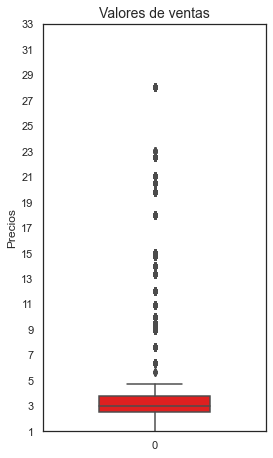

In [131]:
print ('Mediante el gráfico de tipo boxplot, también conocido como grafico de caja y bigotes, se puede ver reflejado los precios de ventas mas representativos para Abril del 2019, donde el valor mas significativo entre ellos es el de:', stat.mode(sales_reciepts['unit_price']))

sns.set(style='white')
fig, ax = plt.subplots(figsize=(4,7.5))
plt.title('Valores de ventas', fontsize=14)
plt.ylabel('Precios')
plt.ylim([1,33])
plt.yticks(np.arange(1,34,2))

sns.boxplot(data=sales_reciepts.unit_price.dropna(), color='red', width=.5)
plt.show()

En el siguiente grafico, se reflejan las precios de ventas mas representativos de Abril de 2019, para tener una mejor vision de las cantidades mas vendidas de productos con relación a su precio. Como se puede apreciar en el siguiente grafico, los productos con un valor de $2.5 y $3 son los mas vendidos en el negocio, los cuales rondan por encima de las 8.500 ventas.


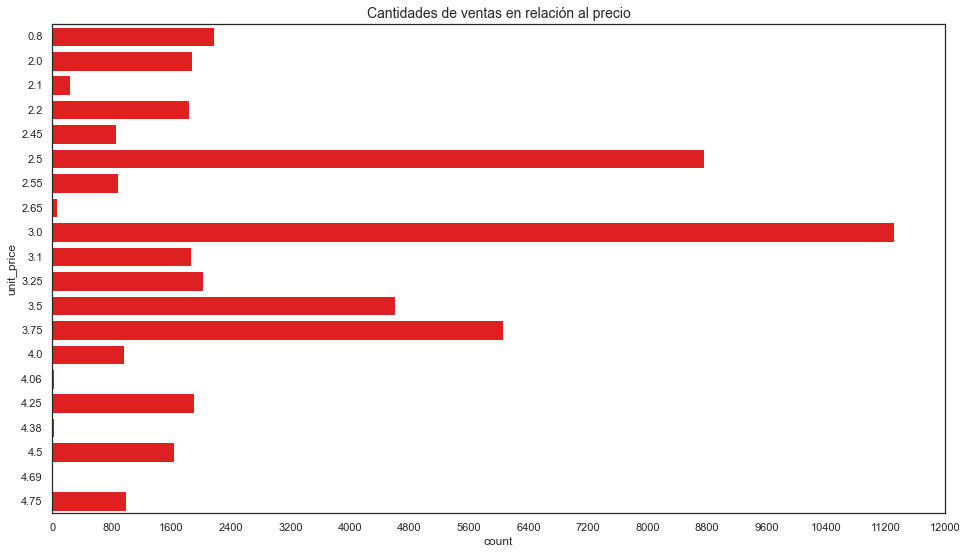

In [132]:
print ('En el siguiente grafico, se reflejan las precios de ventas mas representativos de Abril de 2019, para tener una mejor vision de las cantidades mas vendidas de productos con relación a su precio. Como se puede apreciar en el siguiente grafico, los productos con un valor de $2.5 y $3 son los mas vendidos en el negocio, los cuales rondan por encima de las 8.500 ventas.')

sales_reciepts_limpio=sales_reciepts.drop(sales_reciepts[sales_reciepts['unit_price']>4.75].index)
sales_reciepts_limpio

sns.set(style='white')
fig, ax = plt.subplots(figsize=(16,9))

plt.title('Cantidades de ventas en relación al precio', fontsize=14)
plt.ylabel('Precios')
plt.xlabel('Cantidades vendidas')
plt.xlim([1,12000])
plt.xticks(np.arange(0,12001,800))

sns.countplot(y = sales_reciepts_limpio['unit_price'].dropna(), color='red')
plt.show()

Por medio de la siguiente gráfica de violín podemos confirmar que el resultado demostrado por medio del gráfico de caja y bigotes es correcto, y que los productos con un valor de: 3.0 fueron los mas solicitados en el mes de Abril del 2019


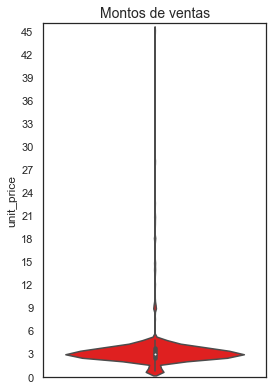

In [133]:
print ('Por medio de la siguiente gráfica de violín podemos confirmar que el resultado demostrado por medio del gráfico de caja y bigotes es correcto, y que los productos con un valor de:',stat.mode(sales_reciepts['unit_price']), 'fueron los mas solicitados en el mes de Abril del 2019')


sns.set(style='white')
fig, ax = plt.subplots(figsize=(4,6.5))

plt.title('Montos de ventas', fontsize=14)
plt.ylim([1,46])
plt.yticks(np.arange(0,47,3))

sns.violinplot(y = sales_reciepts.unit_price.dropna(), data=sales_reciepts , orient="v", color='red')
plt.show()

#### Buscamos analizar qué podemos observar sobre las edades de nuestros clientes

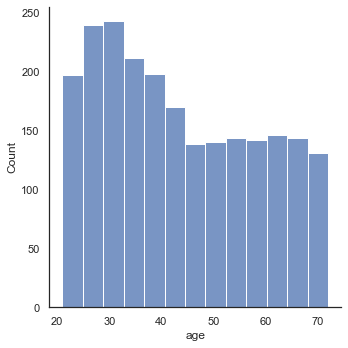

In [134]:
sns.displot(x = customer['age'])

#### Lo que podemos finalmente deducir acerca del análisis hecho sobre la edad de nuestros clientes es que se mantienen un promedio de edad bastante calmo, sin ver picos extremistas en ningun sector de edades en particular. Podría decirse que aumentan un poco aquellos clientes entre 21 y 40 años, pero vemos que la diferencia con las edades que le siguen no son cambios muy abruptos.

## - Análisis Bivariado

In [135]:
sales_reciepts_customer = pd.merge(sales_reciepts,customer)
sales_reciepts_customer.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,...,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,customer_since_DT,birthdate_DT,age
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,...,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39
1,1539,2019-04-01,16:49:47,3,12,558,1,29,1,2.50,...,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39
2,2188,2019-04-01,15:01:02,3,17,558,1,48,2,5.00,...,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39
3,78,2019-04-02,15:24:16,3,17,558,1,60,1,3.75,...,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39
4,14,2019-04-03,19:45:56,3,12,558,1,32,1,3.00,...,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39


In [136]:
sales_reciepts_customer.shape

(24686, 22)

In [137]:
sales_reciepts_customer.count()

transaction_id         24686
transaction_date       24686
transaction_time       24686
sales_outlet_id        24686
staff_id               24686
customer_id            24686
order                  24686
product_id             24686
quantity               24686
line_item_amount       24686
unit_price             24686
home_store             24686
customer_first-name    24686
customer_email         24686
customer_since         24686
loyalty_card_number    24686
birthdate              24686
gender                 24686
birth_year             24686
customer_since_DT      24686
birthdate_DT           24686
age                    24686
dtype: int64

In [138]:
sales_reciepts_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24686 entries, 0 to 24685
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       24686 non-null  int64         
 1   transaction_date     24686 non-null  object        
 2   transaction_time     24686 non-null  object        
 3   sales_outlet_id      24686 non-null  int64         
 4   staff_id             24686 non-null  int64         
 5   customer_id          24686 non-null  int64         
 6   order                24686 non-null  int64         
 7   product_id           24686 non-null  int64         
 8   quantity             24686 non-null  int64         
 9   line_item_amount     24686 non-null  float64       
 10  unit_price           24686 non-null  float64       
 11  home_store           24686 non-null  int64         
 12  customer_first-name  24686 non-null  object        
 13  customer_email       24686 non-

### Información del dataset

           - Por lo que vimos reflejado previamente, estamos en presencia de un data set de ventas de una cafeteria del mes 
             de Abril del 2019, donde se cuenta con 24852 registros de ventas y 22 datos sobre dichas ventas.
           - No contamos con ningun dato nulo, por lo podemos afirmar que el dataset presenta buena calidad de información
             para su analisis.

### Datos a analizar

           - A continuación procedermos a analizar los precios de las ventas, fecha de nacimiento de los consumidores, 
             cantidad de oredenes y genero de dichos compradores.

Mediante el gráfico de tipo boxplot podemos apreciar las personas nacidas entre 1965 y 1991 son las que realizan compras de 1 a 3 productos por ordenes y son las que mayormente compran, mientras que las personas que mas productos compras, es decir 4 productos por orden manjean una media de nacimiento de 1995, a excepcion de los que realizan compras de 8 productos, que son casos exepcionales y son personas nacidas en 1968


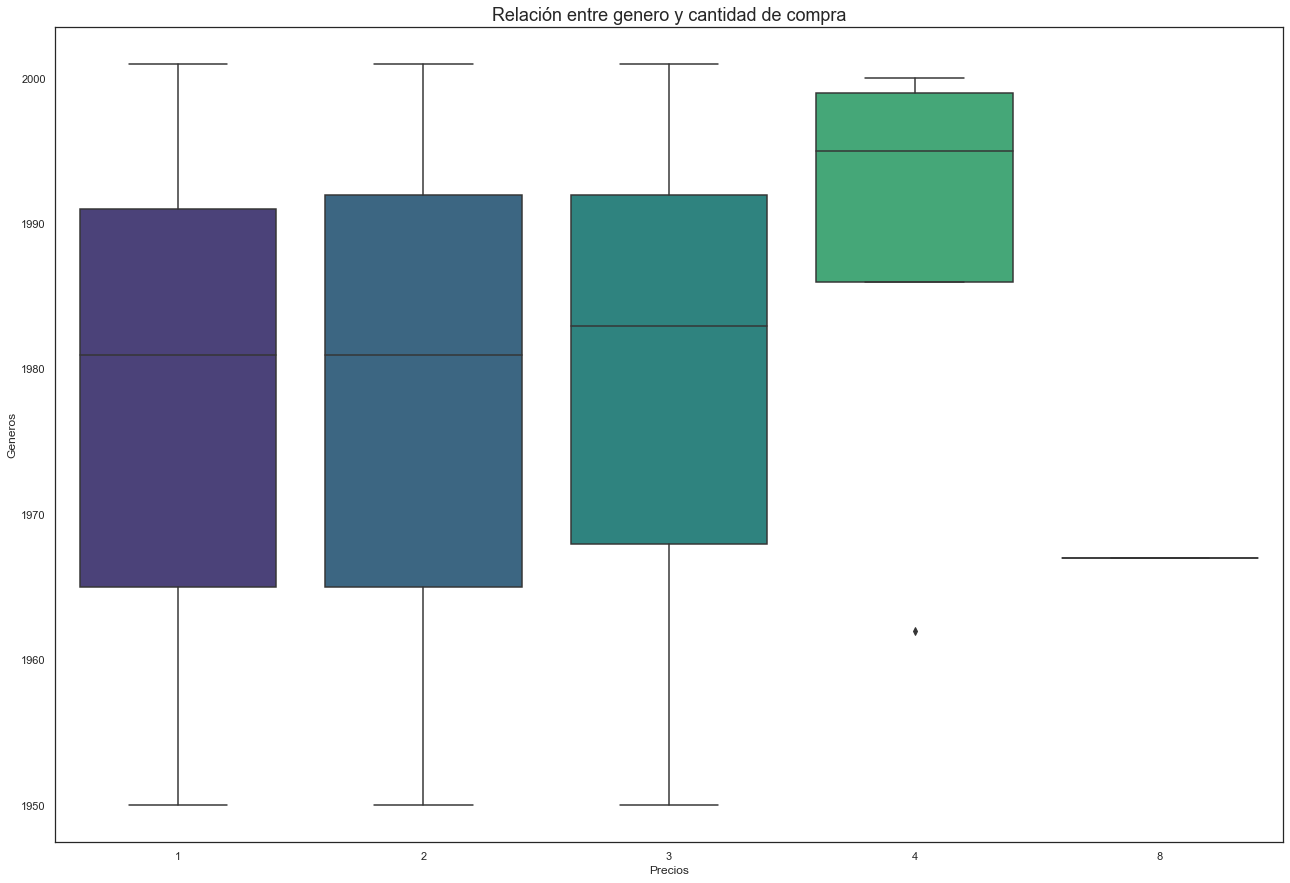

In [139]:
print ('Mediante el gráfico de tipo boxplot podemos apreciar las personas nacidas entre 1965 y 1991 son las que realizan compras de 1 a 3 productos por ordenes y son las que mayormente compran, mientras que las personas que mas productos compras, es decir 4 productos por orden manjean una media de nacimiento de 1995, a excepcion de los que realizan compras de 8 productos, que son casos exepcionales y son personas nacidas en 1968')

plt.rcParams['figure.figsize'] = (22, 15)
sns.boxplot(x = sales_reciepts_customer['quantity'], y = sales_reciepts_customer['birth_year'], palette = 'viridis')
plt.title('Relación entre genero y cantidad de compra', fontsize = 18)
plt.xlabel('Precios')
plt.ylabel('Generos')
plt.show()

Por medio de este grafico de mapa de calor, se puede apreciar que el precio unitario y las ordenes están fuertemente relacionados, ya que el precio unitario conlleva a comprar mayor o menor cantidad del producto


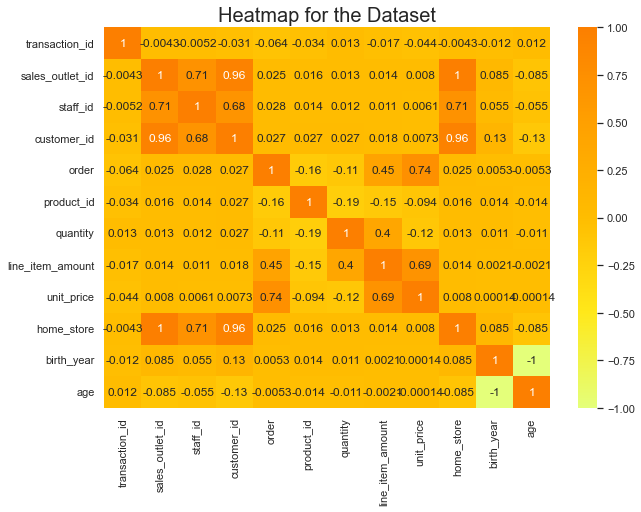

In [140]:
print('Por medio de este grafico de mapa de calor, se puede apreciar que el precio unitario y las ordenes están fuertemente relacionados, ya que el precio unitario conlleva a comprar mayor o menor cantidad del producto')


plt.rcParams['figure.figsize'] = (10, 7)

sns.heatmap(sales_reciepts_customer.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

En el siguiente grafico de violin, se puede apreciar que las distribuciones entre hombres y mujeres son muy parecidos, casi identicos, entre los clientes que nacieron entre 1960 y 1990, también se puede observar que en cuanto al género no definido, observamos que se maneja una media alrededor del año 1995.


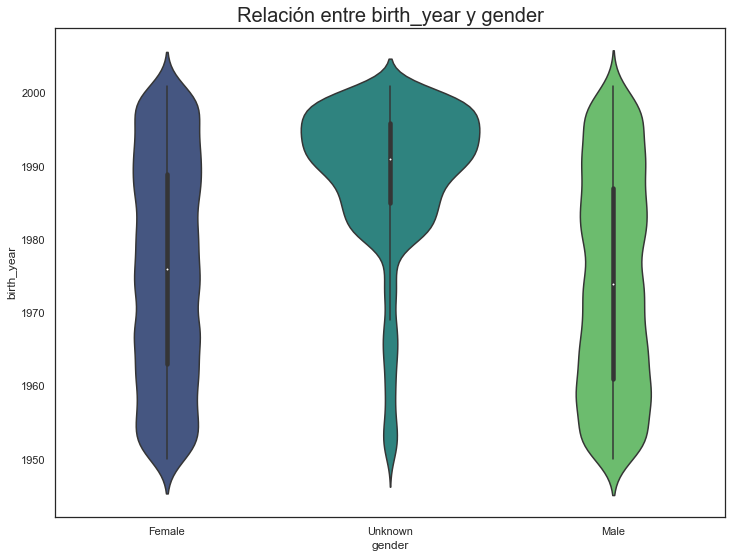

In [141]:
print('En el siguiente grafico de violin, se puede apreciar que las distribuciones entre hombres y mujeres son muy parecidos, casi identicos, entre los clientes que nacieron entre 1960 y 1990, también se puede observar que en cuanto al género no definido, observamos que se maneja una media alrededor del año 1995.')


plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x = sales_reciepts_customer['gender'], y = sales_reciepts_customer['birth_year'], palette = 'viridis')
plt.title('Relación entre birth_year y gender', fontsize = 20)
plt.show()

#### Ahora, queremos visualizar qué ocurre entre las variables de home store y los géneros de los clientes.

<AxesSubplot:xlabel='home_store'>

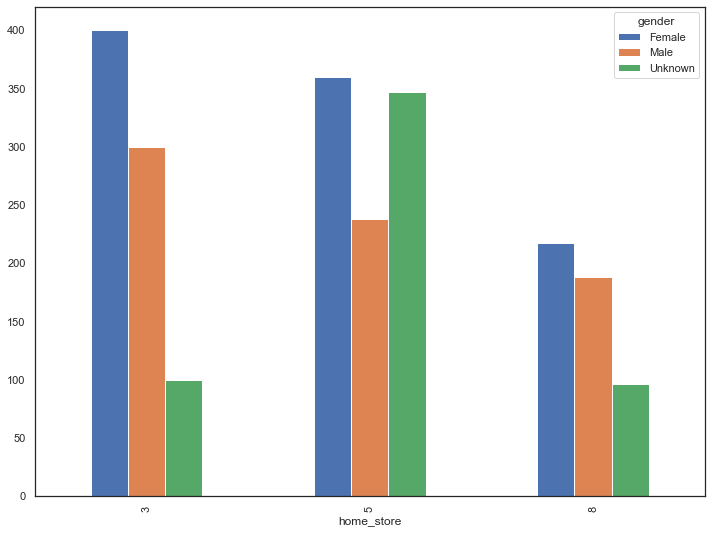

In [142]:
pd.crosstab(customer['home_store'],customer['gender']).plot.bar()

#### Podemos visualizar que en todos los home_store siempre predominan los clientes de género femenino, pero luego podemos ver que los clientes sin identificarse de ningún género aumentan en el home_store 5 (casi igualando al valor del género femenino). Luego en home_store 3 y 8 podemos ver que el género masculino predomina por sobre el sin especificar.

#### Siguiendo con los géneros de los clientes, queremos visualizar qué ocurre entre las variables de las categorías de los productos y los géneros de los clientes.

In [143]:
sales_reciepts_customer_product = pd.merge(sales_reciepts_customer,product)

<AxesSubplot:xlabel='product_category'>

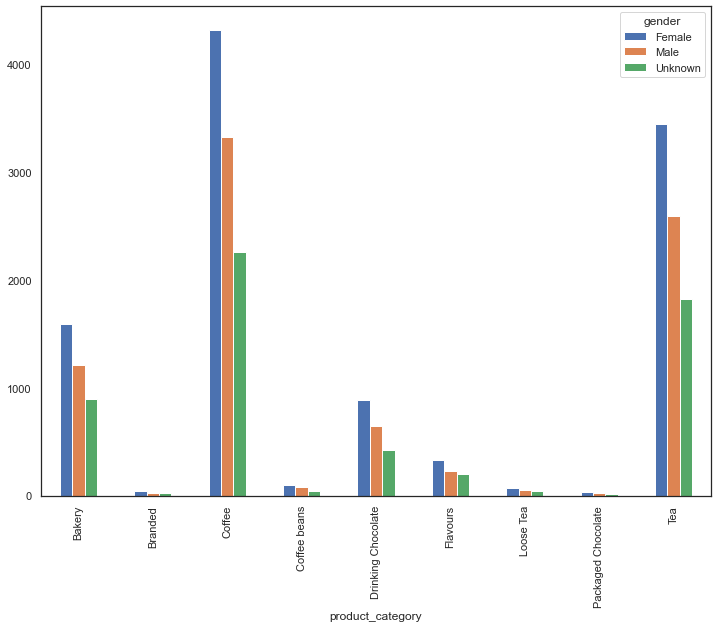

In [144]:
pd.crosstab(sales_reciepts_customer_product['product_category'],sales_reciepts_customer_product['gender']).plot.bar()

#### Podemos visualizar que aunque siempre se mantiene que el genero femenino tiene mayor cantidad de compras que otros géneros, se mantiene un equilibro en cada categoría de los productos del café para las compras de abril de 2019

#### Relacion entre genero de los clientes y lo gastado

In [145]:
totalbygender = sales_reciepts_customer.groupby(['gender'])['line_item_amount'].agg('sum')

<AxesSubplot:ylabel='line_item_amount'>

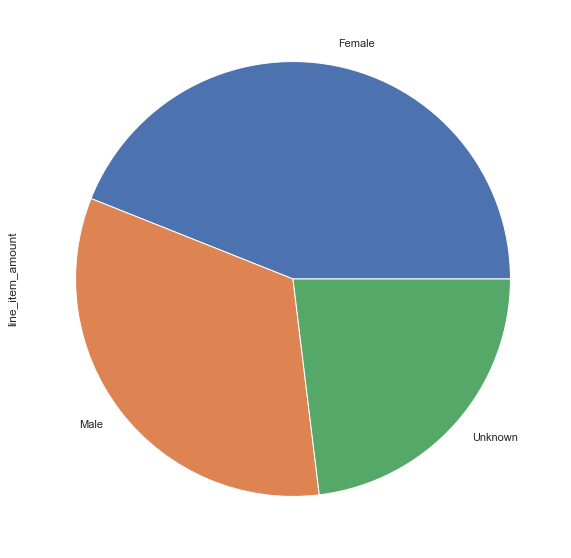

In [146]:
totalbygender.plot.pie(figsize=(10,10))

#### Podemos visualizar que el género femenino es el que más gasta en las compras del café para las compras de abril de 2019

## - Análisis Multivariado

In [147]:
sales_reciepts_customer_generations = pd.merge(sales_reciepts_customer,generations)
sales_reciepts_customer_generations.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,...,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,customer_since_DT,birthdate_DT,age,generation
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.50,...,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39,Older Millennials
1,1539,2019-04-01,16:49:47,3,12,558,1,29,1,2.50,...,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39,Older Millennials
2,2188,2019-04-01,15:01:02,3,17,558,1,48,2,5.00,...,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39,Older Millennials
3,78,2019-04-02,15:24:16,3,17,558,1,60,1,3.75,...,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39,Older Millennials
4,14,2019-04-03,19:45:56,3,12,558,1,32,1,3.00,...,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,Female,1983,2018-06-19,1983-02-25,39,Older Millennials


In [148]:
sales_reciepts_customer_generations.shape

(24686, 23)

In [149]:
sales_reciepts_customer_generations.count()

transaction_id         24686
transaction_date       24686
transaction_time       24686
sales_outlet_id        24686
staff_id               24686
customer_id            24686
order                  24686
product_id             24686
quantity               24686
line_item_amount       24686
unit_price             24686
home_store             24686
customer_first-name    24686
customer_email         24686
customer_since         24686
loyalty_card_number    24686
birthdate              24686
gender                 24686
birth_year             24686
customer_since_DT      24686
birthdate_DT           24686
age                    24686
generation             24686
dtype: int64

In [150]:
sales_reciepts_customer_generations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24686 entries, 0 to 24685
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       24686 non-null  int64         
 1   transaction_date     24686 non-null  object        
 2   transaction_time     24686 non-null  object        
 3   sales_outlet_id      24686 non-null  int64         
 4   staff_id             24686 non-null  int64         
 5   customer_id          24686 non-null  int64         
 6   order                24686 non-null  int64         
 7   product_id           24686 non-null  int64         
 8   quantity             24686 non-null  int64         
 9   line_item_amount     24686 non-null  float64       
 10  unit_price           24686 non-null  float64       
 11  home_store           24686 non-null  int64         
 12  customer_first-name  24686 non-null  object        
 13  customer_email       24686 non-

## Resumen de la información:

    - La información del dataset refleja las ventas, los consumidores y empleados de una cafeteria. 
      Tenemos con 24852 transacciones y 23 datos sobre cada una. 
      No existen valores missings en nuestro dataset.

### Analisis de la información

    - A continuación analisaremos las ventas de la cafeteria, tanto en razon de los clientes que frecuentan en ellas
      el precio de los productos, las cantidades vendidas y el total gastado por cada cliente.

Con este grafico de caja y bigotes podemos apreciar que las distintas generaciones en sus distintos sexos consumen un monto similar, hablando de una media de $3,5 o $4.


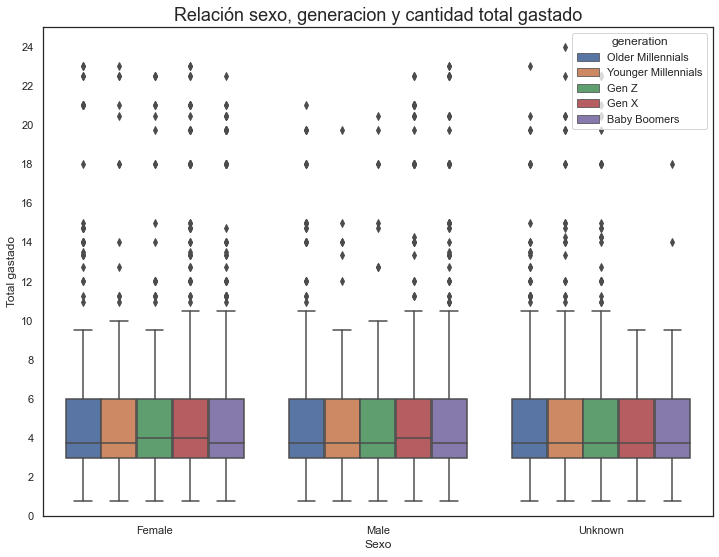

In [151]:
print('Con este grafico de caja y bigotes podemos apreciar que las distintas generaciones en sus distintos sexos consumen un monto similar, hablando de una media de $3,5 o $4.')


sns.boxplot(x='gender', y='line_item_amount', hue='generation', data=sales_reciepts_customer_generations)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Relación sexo, generacion y cantidad total gastado', fontsize = 18)
plt.xlabel('Sexo')
plt.ylabel('Total gastado')
plt.ylim([1,25])
plt.yticks(np.arange(0,26,2))

plt.show()

In [152]:
print('Creo un nuevo DF para realizar un count del total de ordenes que realizado por los clientes, diferenciado por genero y año de nacimiento.')
sales_reciepts_customer_generations_Edad1 = sales_reciepts_customer_generations.groupby(['birth_year','gender']).order.count()

#Reseteo los indices para poder trabajarlo como una tabla plana
sales_reciepts_customer_generations_Edad = sales_reciepts_customer_generations_Edad1.reset_index(name='Total de compras')
sales_reciepts_customer_generations_Edad


Creo un nuevo DF para realizar un count del total de ordenes que realizado por los clientes, diferenciado por genero y año de nacimiento.


,birth_year,gender,Total de compras
0,1950,Female,133
1,1950,Male,115
2,1950,Unknown,12
3,1951,Female,196
4,1951,Male,157
...,...,...,...
151,2000,Male,91
152,2000,Unknown,258
153,2001,Female,58
154,2001,Male,52


Podemos apreciar que la edad y el genero de los consumidores no son muy relevantes para poder analisar las ventas, a partir de aquellos nacidos en 1980 de generos "N" se puede apreciar una minima correlacion entre cantidad de compras y gente mas jodeven.


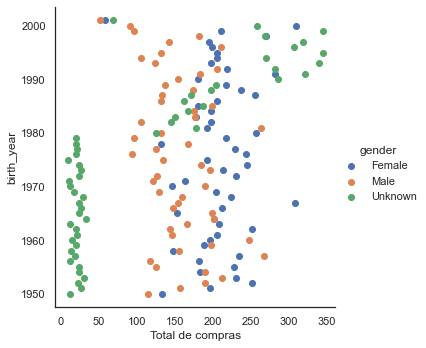

In [153]:
print('Podemos apreciar que la edad y el genero de los consumidores no son muy relevantes para poder analisar las ventas, a partir de aquellos nacidos en 1980 de generos "N" se puede apreciar una minima correlacion entre cantidad de compras y gente mas jodeven.')


sns.FacetGrid(sales_reciepts_customer_generations_Edad, hue = 'gender', height = 5).map(plt.scatter,'Total de compras','birth_year').add_legend();
plt.show()

In [154]:
print('Creo un nuevo DF para realizar un count del total de compras realizadas en razon al precio de cada producto y del punto de venta.')


sales_reciepts_customer_generations_Precio1 = sales_reciepts_customer_generations.groupby(['unit_price','sales_outlet_id']).order.count()

sales_reciepts_customer_generations_Precio1 = sales_reciepts_customer_generations_Precio1.reset_index(name='Total de compras')
sales_reciepts_customer_generations_Precio = sales_reciepts_customer_generations_Precio1.drop(sales_reciepts_customer_generations_Precio1[sales_reciepts_customer_generations_Precio1['sales_outlet_id']==' '].index)
sales_reciepts_customer_generations_Precio

Creo un nuevo DF para realizar un count del total de compras realizadas en razon al precio de cada producto y del punto de venta.


,unit_price,sales_outlet_id,Total de compras
0,0.8,3,173
1,0.8,5,331
2,0.8,8,247
3,2.0,3,359
4,2.0,5,303
...,...,...,...
107,28.0,5,12
108,28.0,8,2
109,45.0,3,5
110,45.0,5,9


Con este grafico de linea comparativo, podemos apreciar que las 3 sucursales tiene casi la misma cantidad de ventas, que fluctuan dependendiendo al precio de venta, por ende se entiende que no influye mucho la ubicación de la sucursal sino mas que nada influye el precio de los productos en los consumidores.


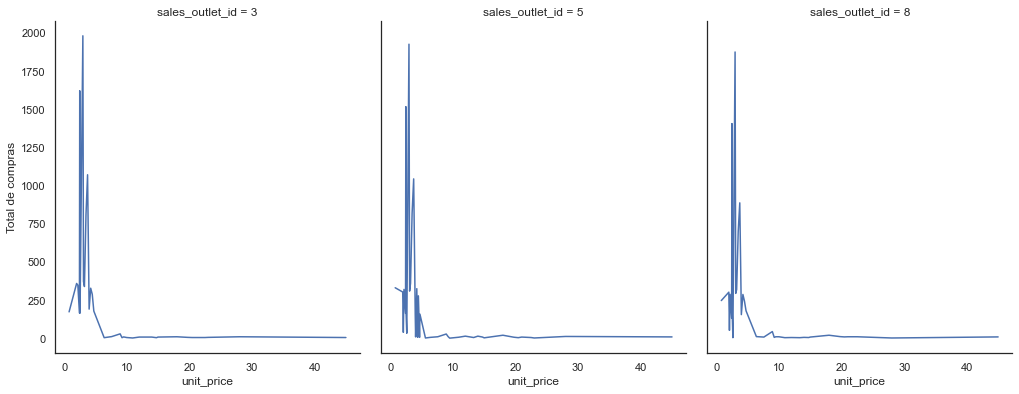

In [155]:
print('Con este grafico de linea comparativo, podemos apreciar que las 3 sucursales tiene casi la misma cantidad de ventas, que fluctuan dependendiendo al precio de venta, por ende se entiende que no influye mucho la ubicación de la sucursal sino mas que nada influye el precio de los productos en los consumidores.')


P_ventas = sns.FacetGrid(sales_reciepts_customer_generations_Precio, col = "sales_outlet_id")
P_ventas.map(sns.lineplot, "unit_price", "Total de compras" )
plt.gcf().set_size_inches(15, 7)

#### Nos interesa ver qué ocurre con lo gastado en las distintas categorías de productos y a su vez diferenciado por género. Obtuvimos que:

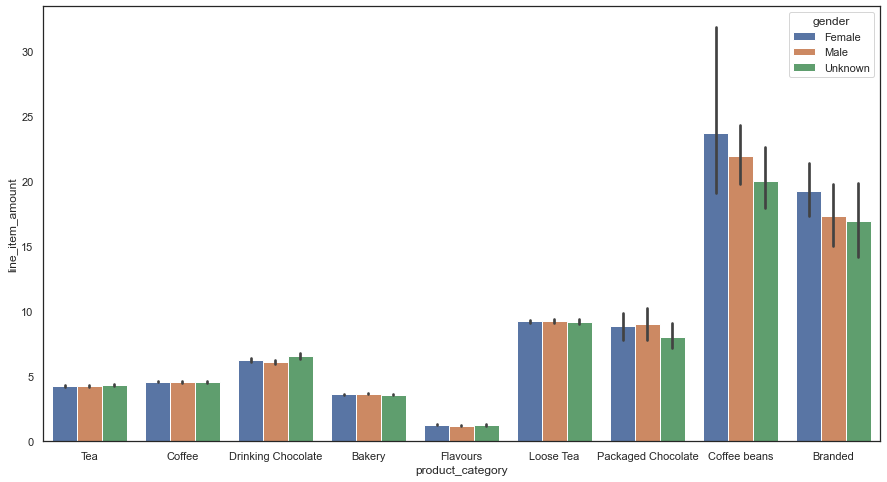

In [156]:
plt.figure(figsize = (15,8))
sns.barplot(hue="gender", x="product_category", y="line_item_amount", data=sales_reciepts_customer_product)
plt.show()

#### Podemos deducir que en los productos como 'Coffe beans' y 'Branded' existe un mayor gasto en comparación a los otros productos. Ademas, sucede que no se ven diferencias abruptas en los gastos de todas las categorías de productos a nivel de género de los clientes

#### Análisis multivariado de: locales, total gastado en abril 2019 y año de nacimiento de los clientes (dispersion)

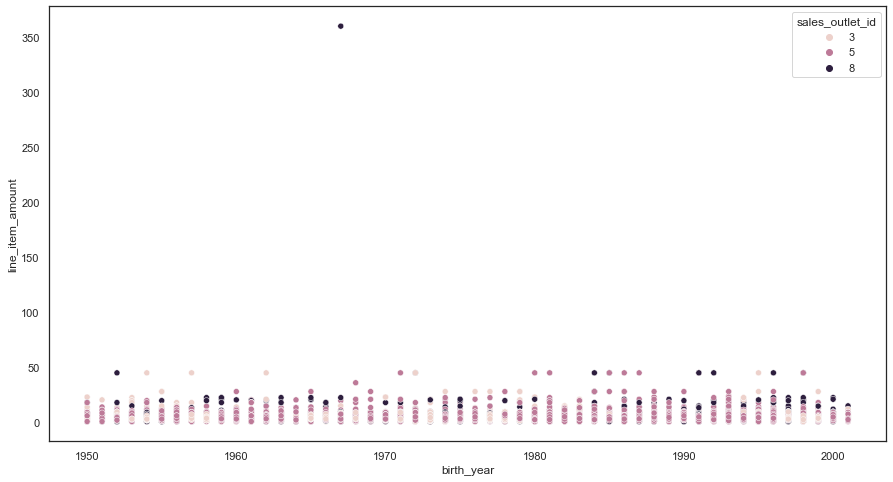

In [157]:
plt.figure(figsize = (15,8))
sns.scatterplot(hue="sales_outlet_id", x="birth_year", y="line_item_amount", data=sales_reciepts_customer)
plt.show()

#### Podemos deducir que la variedad de edades en los distintos locales no se ve segmentada por ninguna edad en particular. Tanto el store 3, 5 y 8 tienen una amplia variedad de edad en cuanto a los clientes

## 7- Contar la historia de sus datos

## Por qué analizamos lo que analizamos, por que borramos ciertos datos o csv, qué obtuvimos, etc

Nuestro análisis se basa en las ventas de las distintas sucursales de la sociedad, con el objetivo de cumplir lo solicitado por el comité de socios. Procedimos realizar análisis univariados, bivariados y multivariados para de esa forma obtener distintas conclusiones y puntos de vista de cuales son los datos más importantes dentro de toda la información proporcionada, borramos aquellos datos irrelevantes para nuestro análisis de ventas y buscamos potenciar al máximo la información de las distintas tablas proporcionada por los integrantes de la SRL, creando de esa forma un dataset ordenado, simplificado y útil.

## 8- Filtros aplicados a los datos. Distribución. Dataset final para analizar

#### A partir de las limpiezas de los datos, los filtros aplicados y análisis correspondientes, determinamos que los dataframes de: Staff, Dates, Pastry Inventory, Sales Target y Sales Outlet no serán de utilidad para nuestra pregunta. Por lo que decidimos descartarlos. Quedando así nuestro dataset final:

In [158]:
sales_reciepts_customer_generations_product = pd.merge(sales_reciepts_customer_generations,product)

sales_reciepts_customer_generations_product

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,order,product_id,quantity,line_item_amount,...,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,12:04:43,3,12,558,1,52,1,2.5,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
1,1693,2019-04-05,11:13:45,3,12,194,1,52,1,2.5,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
2,1617,2019-04-22,11:41:17,3,16,195,1,52,1,2.5,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
3,1478,2019-04-01,13:42:58,5,26,5243,1,52,1,2.5,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
4,1392,2019-04-06,09:23:38,8,42,8186,1,52,2,5.0,...,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,728,2019-04-22,10:12:04,8,44,8033,7,1,1,18.0,...,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
24682,299,2019-04-11,19:32:46,8,43,8122,7,1,1,18.0,...,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
24683,91,2019-04-08,09:13:06,5,26,5026,2,1,2,36.0,...,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
24684,408,2019-04-13,14:49:38,8,43,8411,7,1,1,18.0,...,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N


## 9- Plantear objetivos u objetivo para esos datos

El objetivo de este análisis es identificar los puntos fuertes y débiles dentro de la información que tenemos de las ventas de la sociedad, tomando como base de los datos de las transacciones realizadas en Abril del 2019 de sexo, edad, generación de los clientes, cantidad comprada y precio de los productos dentro de cada orden de compra, horario en que se realizaron las distintas transacciones y los puntos de ventas en donde se realizaron, para así, de esa forma, poder generar una campaña de marketing enfocada en potenciar las ventas en un 50% por cada año hasta lograr conseguir el crecimiento deseado por nuestros clientes.

## 10- Detección de outliers

Luego de observar el dataset final detectamos un outliter en el dataframe de ventas. Vamos a proceder a eliminarlo.

In [159]:
sales_reciepts_customer_generations_product['line_item_amount'].describe().T

count    24686.000000
mean         4.610501
std          3.554118
min          0.800000
25%          3.000000
50%          3.750000
75%          6.000000
max        360.000000
Name: line_item_amount, dtype: float64

In [160]:
datasetSinOutliers=sales_reciepts_customer_generations_product[sales_reciepts_customer_generations_product["line_item_amount"]>=360].index

In [161]:
sales_reciepts_customer_generations_product=sales_reciepts_customer_generations_product.drop(datasetSinOutliers)

In [162]:
sales_reciepts_customer_generations_product['line_item_amount'].describe().T

count    24685.000000
mean         4.596104
std          2.741408
min          0.800000
25%          3.000000
50%          3.750000
75%          6.000000
max         45.000000
Name: line_item_amount, dtype: float64

In [163]:
sales_reciepts_customer_generations_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24685 entries, 0 to 24685
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           24685 non-null  int64         
 1   transaction_date         24685 non-null  object        
 2   transaction_time         24685 non-null  object        
 3   sales_outlet_id          24685 non-null  int64         
 4   staff_id                 24685 non-null  int64         
 5   customer_id              24685 non-null  int64         
 6   order                    24685 non-null  int64         
 7   product_id               24685 non-null  int64         
 8   quantity                 24685 non-null  int64         
 9   line_item_amount         24685 non-null  float64       
 10  unit_price               24685 non-null  float64       
 11  home_store               24685 non-null  int64         
 12  customer_first-name      24685 n

In [164]:
dataset_final = sales_reciepts_customer_generations_product.drop(['product_category','transaction_id','transaction_date','transaction_time','sales_outlet_id','staff_id','customer_id','order','line_item_amount','home_store','customer_first-name','customer_email','customer_since','loyalty_card_number','birthdate','birth_year','customer_since_DT','birthdate_DT','product_type','product','product_description','unit_of_measure','current_wholesale_price','current_retail_price'], axis=1)
dataset_final

,product_id,quantity,unit_price,gender,age,generation,product_group,tax_exempt_yn,promo_yn,new_product_yn
0,52,1,2.5,Female,39,Older Millennials,Beverages,Y,N,N
1,52,1,2.5,Male,39,Older Millennials,Beverages,Y,N,N
2,52,1,2.5,Male,39,Older Millennials,Beverages,Y,N,N
3,52,1,2.5,Unknown,39,Older Millennials,Beverages,Y,N,N
4,52,2,2.5,Male,39,Older Millennials,Beverages,Y,N,N
...,...,...,...,...,...,...,...,...,...,...
24681,1,1,18.0,Unknown,28,Younger Millennials,Whole Bean/Teas,Y,N,N
24682,1,1,18.0,Female,24,Gen Z,Whole Bean/Teas,Y,N,N
24683,1,2,18.0,Male,54,Gen X,Whole Bean/Teas,Y,N,N
24684,1,1,18.0,Female,56,Gen X,Whole Bean/Teas,Y,N,N


# SEGUNDA ENTREGA (24/02/2022)

##     11- Elegir una variable target.

#### Añadimos la columna del target que luego vamos a querer predecir. La misma vamos a llamarla 'MoreThan20' y registrará un 0 en aquellos casos donde el total de lo gastado no superó los 20 dólares y 1 cuando sí haya superado o igualado.

In [165]:
dataset_final['MoreThan20'] = np.where(dataset_final['unit_price']>=20, 1, 0)
dataset_final

,product_id,quantity,unit_price,gender,age,generation,product_group,tax_exempt_yn,promo_yn,new_product_yn,MoreThan20
0,52,1,2.5,Female,39,Older Millennials,Beverages,Y,N,N,0
1,52,1,2.5,Male,39,Older Millennials,Beverages,Y,N,N,0
2,52,1,2.5,Male,39,Older Millennials,Beverages,Y,N,N,0
3,52,1,2.5,Unknown,39,Older Millennials,Beverages,Y,N,N,0
4,52,2,2.5,Male,39,Older Millennials,Beverages,Y,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...
24681,1,1,18.0,Unknown,28,Younger Millennials,Whole Bean/Teas,Y,N,N,0
24682,1,1,18.0,Female,24,Gen Z,Whole Bean/Teas,Y,N,N,0
24683,1,2,18.0,Male,54,Gen X,Whole Bean/Teas,Y,N,N,0
24684,1,1,18.0,Female,56,Gen X,Whole Bean/Teas,Y,N,N,0


In [166]:
dataset_final["MoreThan20"].value_counts()

0    24570
1      115
Name: MoreThan20, dtype: int64

##     12- Preparación de los datos

In [167]:
#Hay campos que aun no son numéricos así que los convertimos, es decir, reemplazamos valores de caracteres por números

In [168]:
#Gender
dataset_final = dataset_final.replace({'Female':'2','Male':'1','Unknown':'0'})
dataset_final["gender"].value_counts()

2    10796
1     8165
0     5724
Name: gender, dtype: int64

In [169]:
#Promo yes or no, Excento de impuestos y Nuevos productos
dataset_final = dataset_final.replace({'Y':'1','N':'0'})
dataset_final["promo_yn"].value_counts()

0    24685
Name: promo_yn, dtype: int64

In [170]:
dataset_final["tax_exempt_yn"].value_counts()

1    20913
0     3772
Name: tax_exempt_yn, dtype: int64

In [171]:
dataset_final["new_product_yn"].value_counts()

0    24685
Name: new_product_yn, dtype: int64

In [172]:
#Product group
dataset_final = dataset_final.replace({'Beverages':'5','Food':'4','Add-ons':'3','Whole Bean/Teas':'2','Merchandise':'1'})
dataset_final["product_group"].value_counts()

5    19724
4     3690
3      751
2      438
1       82
Name: product_group, dtype: int64

In [173]:
#Generation
dataset_final = dataset_final.replace({'Younger Millennials':'5','Older Millennials':'4','Gen X':'3','Baby Boomers':'2','Gen Z':'1'})
dataset_final["generation"].value_counts()

2    5977
3    5657
4    5433
1    4265
5    3353
Name: generation, dtype: int64

In [174]:
#Veamos informacion final
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24685 entries, 0 to 24685
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      24685 non-null  int64  
 1   quantity        24685 non-null  int64  
 2   unit_price      24685 non-null  float64
 3   gender          24685 non-null  object 
 4   age             24685 non-null  int32  
 5   generation      24685 non-null  object 
 6   product_group   24685 non-null  object 
 7   tax_exempt_yn   24685 non-null  object 
 8   promo_yn        24685 non-null  object 
 9   new_product_yn  24685 non-null  object 
 10  MoreThan20      24685 non-null  int32  
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 2.1+ MB


In [175]:
#Hay campos que aun no son numéricos así que los convertimos
dataset_final["gender"] = dataset_final["gender"].astype(str).astype(int)
dataset_final["product_group"] = dataset_final["product_group"].astype(str).astype(int)
dataset_final["tax_exempt_yn"] = dataset_final["tax_exempt_yn"].astype(str).astype(int)
dataset_final["promo_yn"] = dataset_final["promo_yn"].astype(str).astype(int)
dataset_final["new_product_yn"] = dataset_final["new_product_yn"].astype(str).astype(int)
dataset_final["generation"] = dataset_final["new_product_yn"].astype(str).astype(int)
dataset_final["MoreThan20"] = dataset_final["MoreThan20"].astype(str).astype(int)

In [240]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24685 entries, 0 to 24685
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      24685 non-null  int64  
 1   quantity        24685 non-null  int64  
 2   unit_price      24685 non-null  float64
 3   gender          24685 non-null  int32  
 4   age             24685 non-null  int32  
 5   generation      24685 non-null  int32  
 6   product_group   24685 non-null  int32  
 7   tax_exempt_yn   24685 non-null  int32  
 8   promo_yn        24685 non-null  int32  
 9   new_product_yn  24685 non-null  int32  
 10  MoreThan20      24685 non-null  int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 1.5 MB


In [241]:
dataset_final.head()

,product_id,quantity,unit_price,gender,age,generation,product_group,tax_exempt_yn,promo_yn,new_product_yn,MoreThan20
0,52,1,2.5,2,39,0,5,1,0,0,0
1,52,1,2.5,1,39,0,5,1,0,0,0
2,52,1,2.5,1,39,0,5,1,0,0,0
3,52,1,2.5,0,39,0,5,1,0,0,0
4,52,2,2.5,1,39,0,5,1,0,0,0


In [242]:
x = dataset_final.drop(["MoreThan20","unit_price"], axis=1)
y = dataset_final["MoreThan20"]

#### El dataset se compone de 12 columnas de las cuales 11 corresponden a variables que usaremos para predecir el target.  MoreThan20 es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

##     13- Seleccionar algoritmos candidatos, definiendo qué parametros probar con datos para cada algoritmo mediante un análisis comparativo. 
    (Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo)

<h1>Random Forest</h1>

<b>Genero el modelo Random Forest y lo entreno</b>

In [243]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, stratify=y, test_size=0.50, random_state=11)

In [244]:
model = RandomForestClassifier(random_state=11, max_depth=3, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='log2', n_estimators=200, random_state=11)

<b>Grafico el modelo</b>

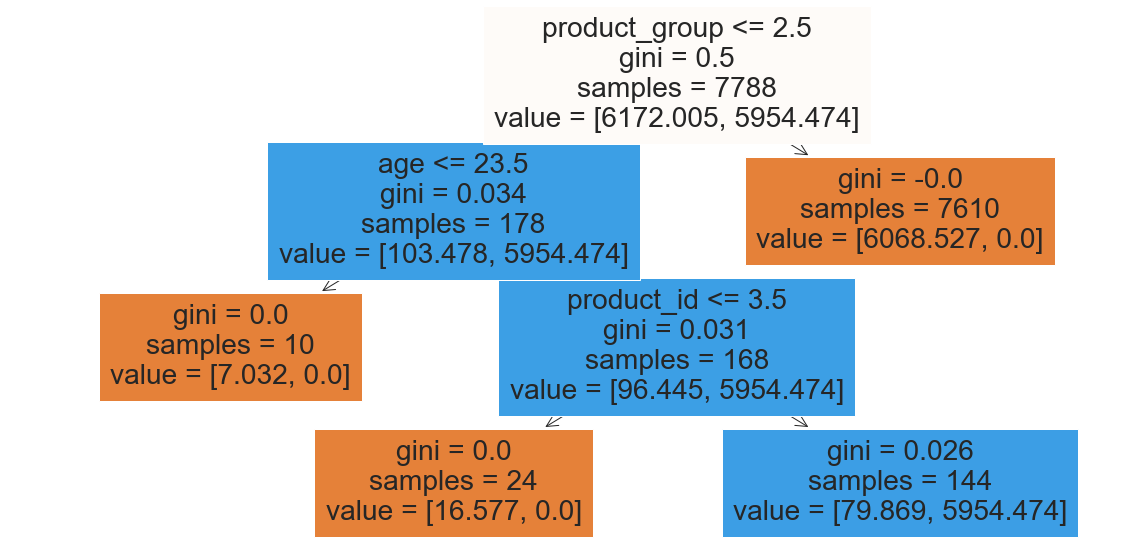

In [245]:
plt.figure(figsize=(20,10))
_ = tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True)


<h2>Grafico el impacto de cada una de las columnas en el Random Forest</h2>

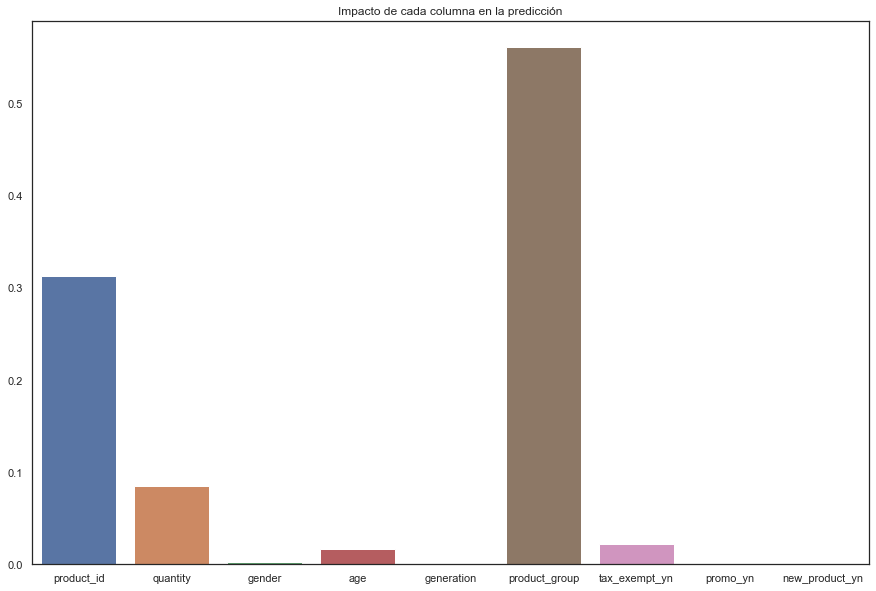

In [246]:
plt.figure(figsize=(15,10))

Importance = model.feature_importances_
Columnas = x.columns

sns.barplot(x=Columnas,y=Importance)
plt.title('Impacto de cada columna en la predicción')
plt.show()

En base a los gráficos, podemos detectar cuales son las columnas mas importantes a la hora de detectar los patrones de personas y productos para conseguir ventas de mayor costo. 

A diferencia de lo que se creía antes de inicar el análisis, no es el tipo de cliente el que define el monto gastado, si no que el tipo de producto.

In [247]:
y_test_pred = model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [248]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.9860649760998137

In [249]:
data_df = pd.DataFrame(y_test_pred)
data_df.value_counts()

0    12113
1      230
dtype: int64

<h1>KNN</h1>

<b>Escalo los valores del DataSet y genero nueva información de train y test para que todos estén en la misma escala y ayudar así al KNN</b>

In [250]:
escalador = MinMaxScaler()

x = dataset_final.drop(["MoreThan20","unit_price"], axis=1)
y = dataset_final["MoreThan20"]


x = escalador.fit_transform(x)

(x_train, x_test, y_train, y_test) = train_test_split(x, y, stratify=y, test_size=0.50, random_state=11)

<b>Genero el modelo y lo entreno</b>

In [251]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<b>Evaluo el desempeño del modelo</b>

In [252]:
clasificador.score(x_test, y_test)

0.9953819978935429

<b>Conclusión</b>

Para este DataSet, puedo ver que ambos modelos funcionan de forma muy similar. Tanto el Random Forest como el KNN dan predicciones muy cercanas a 1.